In [526]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [527]:
data_raw = pd.read_csv('EVdataset.csv')
data_raw.info()
data_raw.describe()
data_raw.isnull().sum()

df = data_raw.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   315 non-null    int64 
 1   Model                        315 non-null    object
 2   Brand                        315 non-null    object
 3   Price_in_Pounds              208 non-null    object
 4   Acceleration 0 - 100 km/h    297 non-null    object
 5   Top Speed                    302 non-null    object
 6   Electric Range *             255 non-null    object
 7   Total Power *                5 non-null      object
 8   Total Torque *               6 non-null      object
 9   Drive                        315 non-null    object
 10  Nominal Capacity             228 non-null    object
 11  Battery Type                 315 non-null    object
 12  Number of Cells              315 non-null    object
 13  Architecture                 315 no

Cleaning the dataset

In [528]:
#consolidate like columns

df['Electric Range'] = df['Electric Range *'].combine_first(df['Electric Range'])
df.drop(['Electric Range *'], axis=1, inplace=True)

df['Total Power'] = df['Total Power *'].combine_first(df['Total Power'])
df.drop(['Total Power *'], axis=1, inplace=True)

df['Range'] = df['Range *'].combine_first(df['Range'])
df.drop(['Range *'], axis=1, inplace=True)

df['City - Cold Weather'] = df['City - Cold Weather *'].combine_first(df['City - Cold Weather'])
df.drop(['City - Cold Weather *'], axis=1, inplace=True)

df['Useable Capacity'] = df['Useable Capacity*'].combine_first(df['Useable Capacity'])
df.drop(['Useable Capacity*'], axis=1, inplace=True)

df['Highway - Cold Weather'] = df['Highway - Cold Weather *'].combine_first(df['Highway - Cold Weather'])
df.drop(['Highway - Cold Weather *'], axis=1, inplace=True)
df['Combined - Cold Weather'] = df['Combined - Cold Weather *'].combine_first(df['Combined - Cold Weather'])
df.drop(['Combined - Cold Weather *'], axis=1, inplace=True)
df['City - Mild Weather'] = df['City - Mild Weather *'].combine_first(df['City - Mild Weather'])
df.drop(['City - Mild Weather *'], axis=1, inplace=True)
df['Highway - Mild Weather'] = df['Highway - Mild Weather *'].combine_first(df['Highway - Mild Weather'])
df.drop(['Highway - Mild Weather *'], axis=1, inplace=True)
df['Combined - Mild Weather'] = df['Combined - Mild Weather *'].combine_first(df['Combined - Mild Weather'])
df.drop(['Combined - Mild Weather *'], axis=1, inplace=True)

df['Total Torque'] = df['Total Torque *'].combine_first(df['Total Torque'])
df.drop(['Total Torque *'], axis=1, inplace=True)

df['Rated Fuel Equivalent'] = df['Rated Fuel Equivalent *'].combine_first(df['Rated Fuel Equivalent'])
df.drop(['Rated Fuel Equivalent *'], axis=1, inplace=True)

df['Top Speed'] = df['Top Speed *'].combine_first(df['Top Speed'])
df.drop(['Top Speed *'], axis=1, inplace=True)

df['Acceleration 0 - 100 km/h'] = df['Acceleration 0 - 100 km/h *'].combine_first(df['Acceleration 0 - 100 km/h'])
df.drop(['Acceleration 0 - 100 km/h *'], axis=1, inplace=True)


df['Nominal Capacity'] = df['Nominal Capacity							*'].combine_first(df['Nominal Capacity'])
df.drop(['Nominal Capacity							*'], axis=1, inplace=True)


df.drop(['Rated Consumption *'], axis=1, inplace=True)
df.drop(['Vehicle Fuel Equivalent *'], axis=1, inplace=True)
df.drop(['Vehicle Consumption *'], axis=1, inplace=True)

#Redundant columns 
df.drop(['Battery Type'], axis=1, inplace=True)
df.drop(['CO2 Emissions'], axis=1, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)


df['Price_in_Pounds'] = df['Price_in_Pounds'].str.replace(',','')
df['Price USD'] = df['Price_in_Pounds'].astype(float) * 1.24

df.drop(['Price_in_Pounds'], axis=1, inplace=True)
# df.dtypes
#27 columns left 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model                      315 non-null    object 
 1   Brand                      315 non-null    object 
 2   Acceleration 0 - 100 km/h  315 non-null    object 
 3   Top Speed                  315 non-null    object 
 4   Drive                      315 non-null    object 
 5   Nominal Capacity           315 non-null    object 
 6   Number of Cells            315 non-null    object 
 7   Architecture               315 non-null    object 
 8   Cathode Material           315 non-null    object 
 9   Pack Configuration         315 non-null    object 
 10  Nominal Voltage            315 non-null    object 
 11  Range                      315 non-null    object 
 12  Rated Consumption          296 non-null    object 
 13  Vehicle Consumption        296 non-null    object 

In [529]:
#cleaning up units
df['Brand'] = df['Brand'].astype(str)

for column_name, column_data in df.iteritems():
    # Check if the column contains units (e.g., 'sec')
    if column_data.dtype == 'object' and column_data.str.endswith('sec').all():
        cleaned_values = column_data.str.rstrip('sec')
        df[column_name] = cleaned_values.astype(float)
    
    elif column_data.dtype == 'object' and column_data.str.endswith('km/h').all():
        cleaned_values = column_data.str.rstrip('km/h')
        df[column_name] = cleaned_values.astype(float)

    elif column_data.dtype == 'object' and column_data.str.endswith('Wh/km').all():
        cleaned_values = column_data.str.rstrip('Wh/km')
        df[column_name] = cleaned_values.astype(float)


    elif column_data.dtype == 'object' and column_data.str.endswith('kWh').all():
        cleaned_values = column_data.str.rstrip('kWh')
        df[column_name] = cleaned_values.astype(float)


    


C:\Users\rishu\AppData\Local\Temp\ipykernel_21736\3764541377.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in df.iteritems():


In [530]:
df['Rated Consumption'] = df['Rated Consumption'].astype(str)
df['Rated Consumption']=  df['Rated Consumption'].str.extract('(\d+)').astype(float)

df['Electric Range'] = df['Electric Range'].astype(str)
df['Electric Range']=  df['Electric Range'].str.extract('(\d+)').astype(float)

df['Range'] = df['Range'].astype(str)
df['Range']=  df['Range'].str.extract('(\d+)').astype(float)

df['Total Torque'] = df['Total Torque'].astype(str)
df['Total Torque']=  df['Total Torque'].str.extract('(\d+)').astype(float)

df['Vehicle Fuel Equivalent'] = df['Vehicle Fuel Equivalent'].astype(str)
df['Vehicle Fuel Equivalent']=  df['Vehicle Fuel Equivalent'].str.extract('(\d+)').astype(float)

df['Rated Fuel Equivalent'] = df['Rated Fuel Equivalent'].astype(str)
df['Rated Fuel Equivalent']=  df['Rated Fuel Equivalent'].str.extract('(\d+)').astype(float)

df['Nominal Voltage'] = df['Nominal Voltage'].astype(str)
df['Nominal Voltage']=  df['Nominal Voltage'].str.extract('(\d+)').astype(float)

df['Total Power'] = df['Total Power'].astype(str)
df['Total Power']=  df['Total Power'].str.extract('(\d+)').astype(float)



Exploring the Data

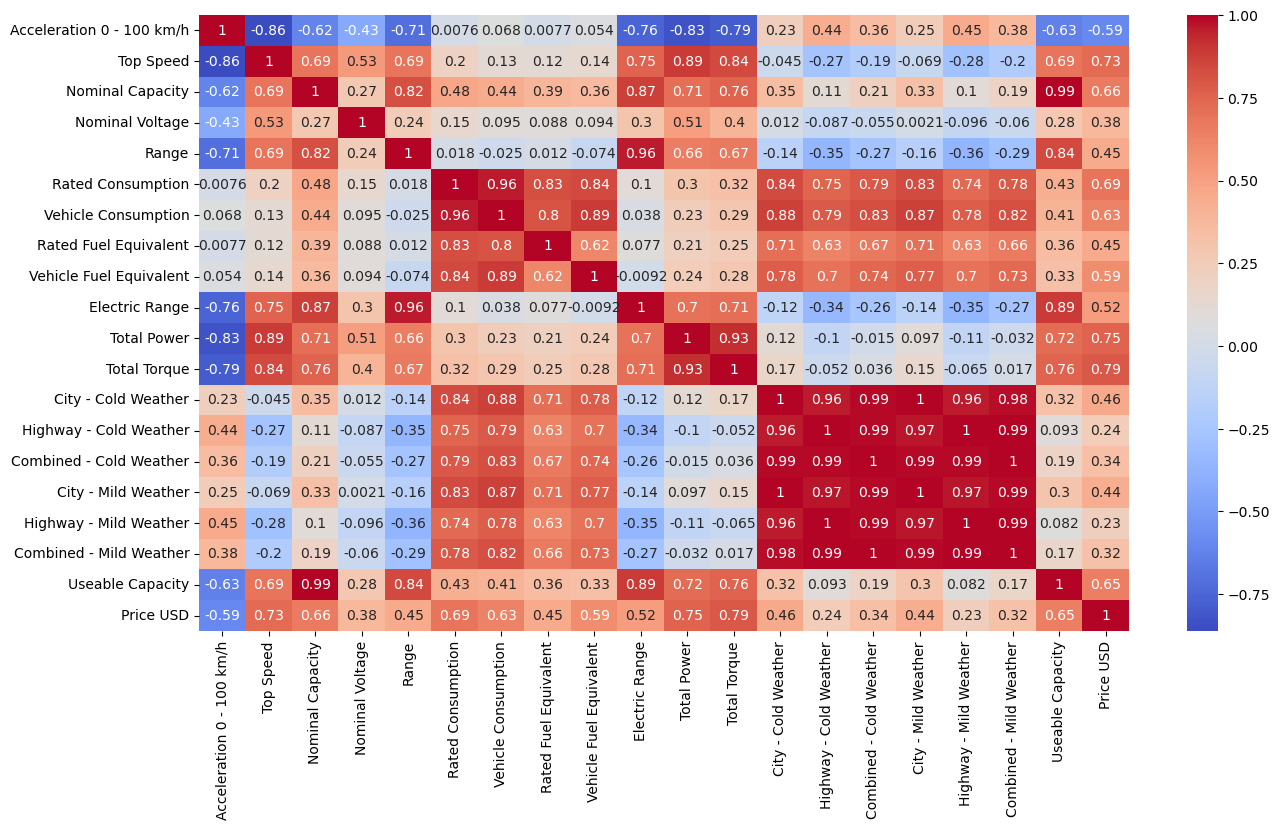

In [531]:


ax= plt.figure(figsize=(15,8))
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

# Display the plot
plt.show()

mean:
77838.57961538462
median:
64662.9
mean w/o outlier 76117.99304347829
mdn w/o outlier 64616.4


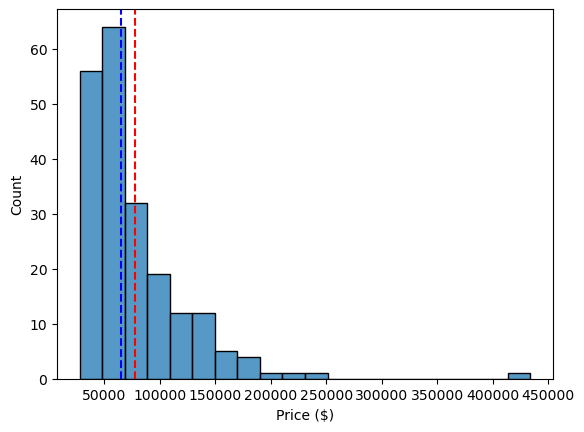

In [532]:
#price info

sns.histplot(x = df['Price USD'], bins = 20)
plt.xlabel('Price ($)')
plt.axvline(x=df['Price USD'].mean(),
            color='red', ls = '--')
plt.axvline(x=df['Price USD'].median(),
            color='blue', ls = '--')

print('mean:')
print(df['Price USD'].mean())
print('median:')
print(df['Price USD'].median())
# print(df['Price USD'])
# print(df.loc[df['Price USD'] < 350000, 'Price USD'])

mean_noOutliers= df.loc[df['Price USD'] < 350000, 'Price USD'].mean()
mdn_noOutliers= df.loc[df['Price USD'] < 350000, 'Price USD'].median()

print('mean w/o outlier ' + str(mean_noOutliers))
print('mdn w/o outlier ' + str(mdn_noOutliers))

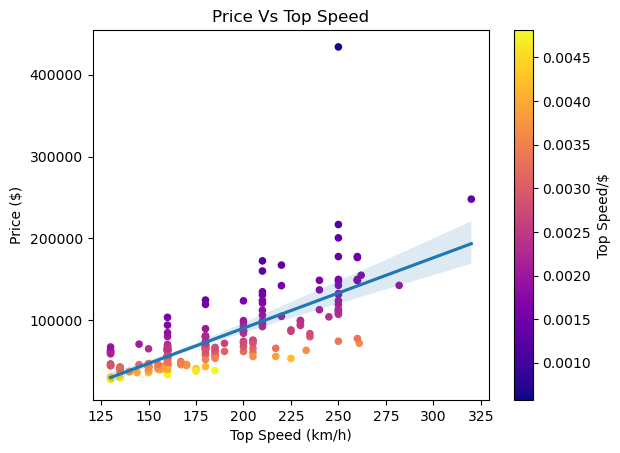

In [533]:

#ratio
ratio = df['Top Speed'] / df['Price USD']

# Create scatter 
plt.scatter(x=df['Top Speed'], y=df['Price USD'], c=ratio, cmap='plasma', s = 20)
plt.colorbar(label='Top Speed/$')

# Add regression line
sns.regplot(x=df['Top Speed'], y=df['Price USD'], scatter=False)

plt.title('Price Vs Top Speed')
plt.ylabel('Price ($)')
plt.xlabel('Top Speed (km/h)')

plt.show()


df_mod = df.copy()
df_mod['ratio'] = df_mod['Top Speed'] / df_mod['Price USD']
df_mod['ratio2'] = df_mod['Range'] / df_mod['Price USD']
#df mod has ratios included 

Text(0.5, 0, 'Range (km)')

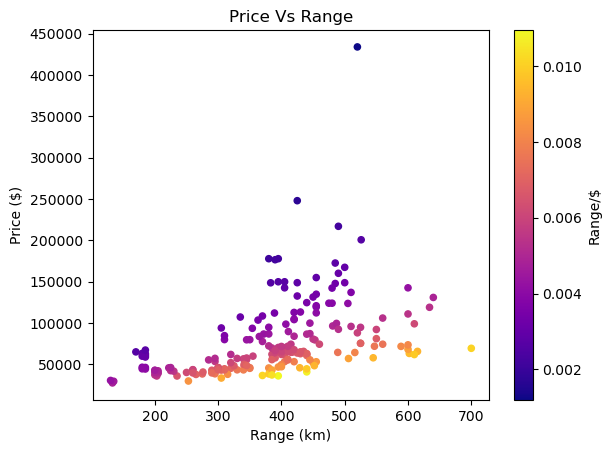

In [534]:
ratio = df['Range'] / df['Price USD']

plt.scatter(x=df['Range'], y=df['Price USD'], c=ratio, cmap='plasma', s = 20)
plt.colorbar(label='Range/$')

plt.title('Price Vs Range')
plt.ylabel('Price ($)')
plt.xlabel('Range (km)')

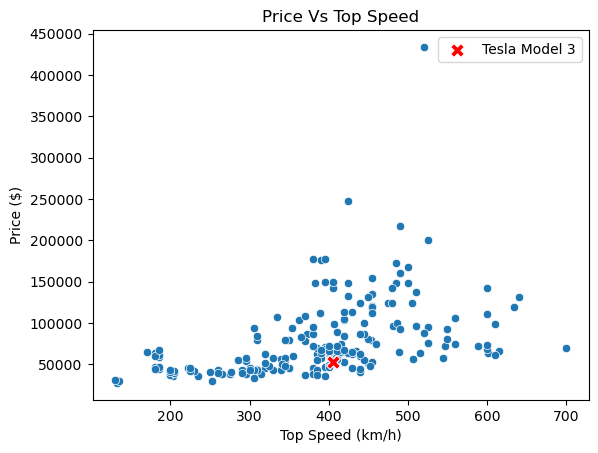

In [535]:
# Filter DataFrame for Tesla Model 3
tesla_model_3 = df[df['Model'] == 'Tesla Model 3']

# Plot all data points
sns.scatterplot(x=df['Range'], y=df['Price USD'])

# Plot the specific point for Tesla Model 3
sns.scatterplot(x=tesla_model_3['Range'], y=tesla_model_3['Price USD'], color='red', s=100, marker='X', label='Tesla Model 3')

plt.title('Price Vs Top Speed')
plt.ylabel('Price ($)')
plt.xlabel('Top Speed (km/h)')
plt.legend()
plt.show()

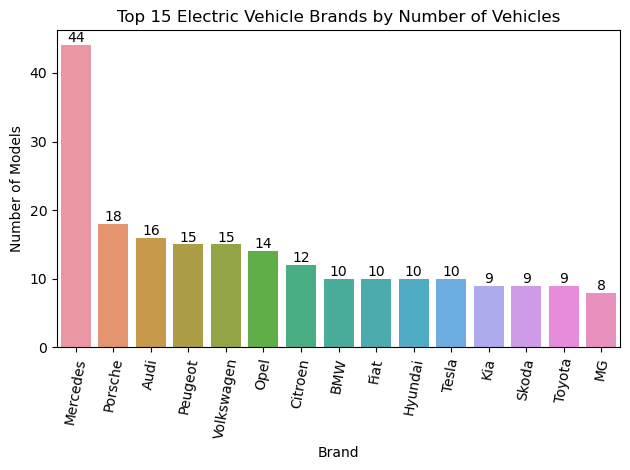

In [536]:
brand_counts = df.groupby(['Brand']).size().reset_index(name='counts')

# Set the number of brands 
top_n = 15

top_brands = brand_counts.nlargest(top_n, 'counts')

ax = sns.barplot(x=top_brands['Brand'], y=top_brands['counts'])
plt.title('Top {} Electric Vehicle Brands by Number of Vehicles'.format(top_n))
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=80)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\rishu\AppData\Local\Temp\ipykernel_21736\991038527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_vs = df.groupby(['Brand']).mean().reset_index()


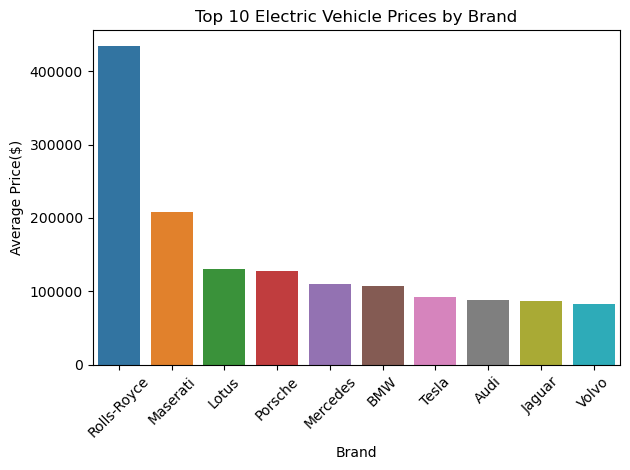

In [537]:
price_vs = df.groupby(['Brand']).mean().reset_index()

# Set the number of top brands to display
top_n = 10

# Get the top N brands based on average price
top_brands = price_vs.nlargest(top_n, 'Price USD')

# Plot the top N brands
ax = sns.barplot(x=top_brands['Brand'], y=top_brands['Price USD'],)
plt.title('Top {} Electric Vehicle Prices by Brand'.format(top_n))
plt.xlabel('Brand')
plt.ylabel('Average Price($)')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

C:\Users\rishu\AppData\Local\Temp\ipykernel_21736\1988903270.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_vs = df.groupby(['Brand']).mean().reset_index()


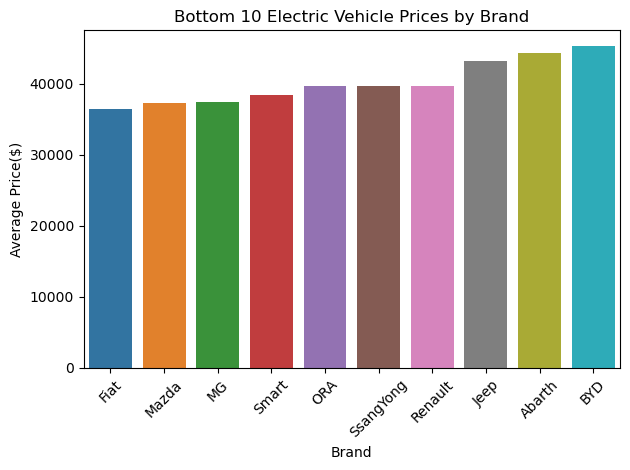

In [538]:
price_vs = df.groupby(['Brand']).mean().reset_index()

# Set the number of bottom brands to display
bottom_n = 10

# Get the bottom N brands based on average price
bottom_brands = price_vs.nsmallest(bottom_n, 'Price USD')

# Plot the bottom N brands
ax = sns.barplot(x=bottom_brands['Brand'], y=bottom_brands['Price USD'])
plt.title('Bottom {} Electric Vehicle Prices by Brand'.format(bottom_n))
plt.xlabel('Brand')
plt.ylabel('Average Price($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

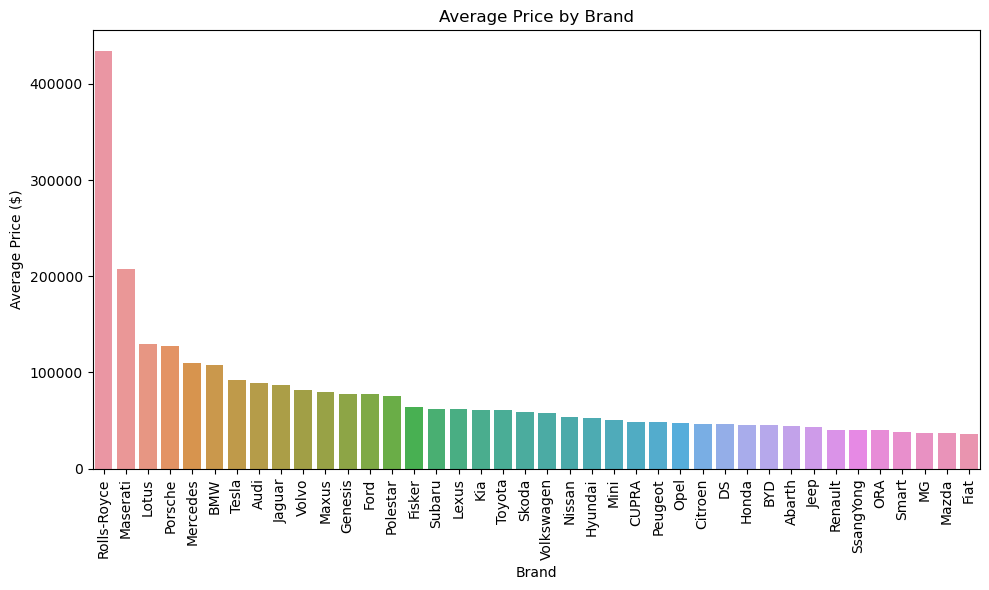

In [539]:
price_vs = df.groupby(['Brand'])['Price USD'].mean().reset_index()
price_vs = price_vs.dropna(subset=['Price USD'])  # Remove rows with NaN values in the 'Price USD' column
price_vs = price_vs.sort_values('Price USD', ascending=False)  # Sort by average price in descending order

plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Price USD', data=price_vs)
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

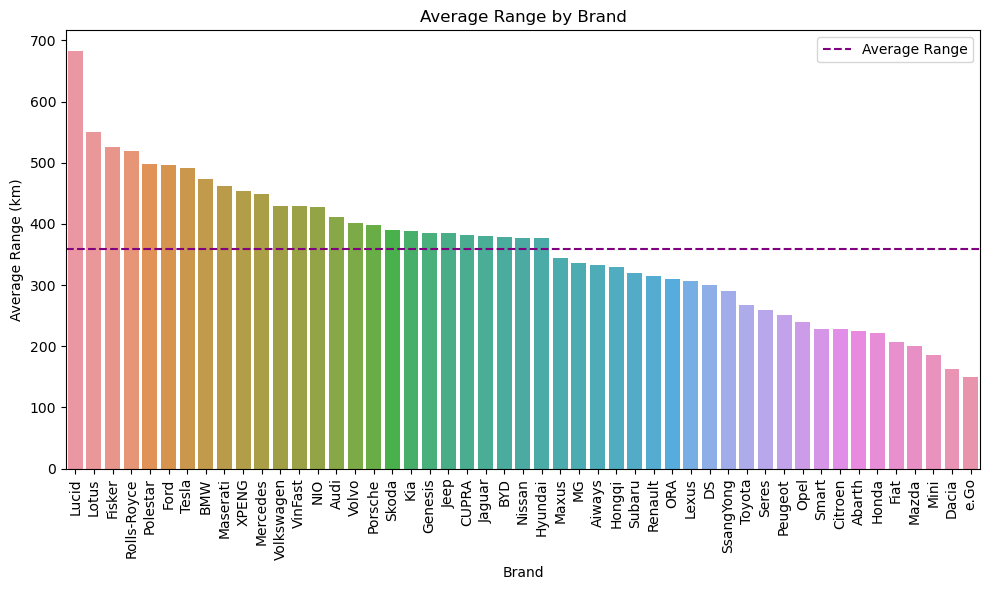

In [540]:
Range_vs = df.groupby(['Brand'])['Range'].mean().reset_index()
Range_vs = Range_vs.sort_values('Range', ascending=False)  # Sort by average range in descending order

plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Range', data=Range_vs)
plt.title('Average Range by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Range (km)')
plt.xticks(rotation=90)
plt.tight_layout()

# Calculate the average range
avg_range = Range_vs['Range'].mean()

# Add a horizontal line for the average range
plt.axhline(avg_range, color='purple', linestyle='--', label='Average Range')

plt.legend()
plt.show()


74.0


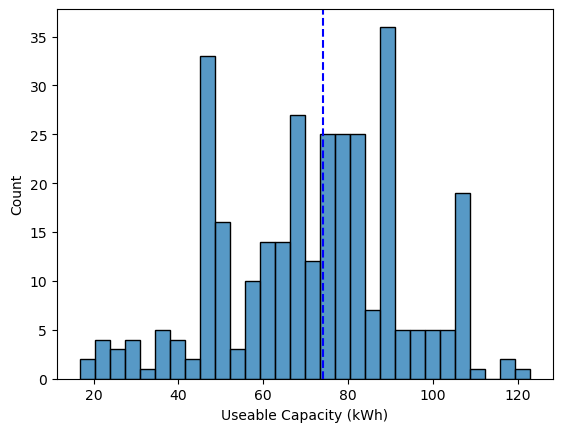

In [541]:
sns.histplot(x = df['Useable Capacity'], bins = 30)
plt.xlabel('Useable Capacity (kWh)')
# plt.axvline(x=df['Price USD'].mean(),
#             color='red', ls = '--')
plt.axvline(x=df['Useable Capacity'].median(),
            color='blue', ls = '--')
print(df['Useable Capacity'].median())

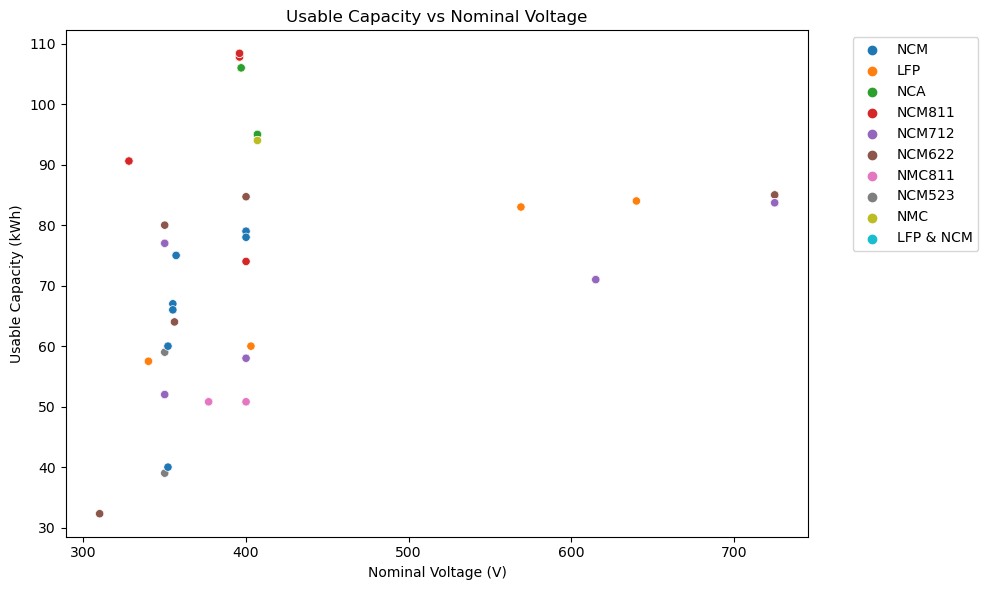

In [542]:


filtered_data = df[df['Cathode Material'] != 'No Data']

plt.figure(figsize=(10, 6))


sns.scatterplot(x='Nominal Voltage', y='Useable Capacity', hue='Cathode Material', data=filtered_data)
plt.title('Usable Capacity vs Nominal Voltage')
plt.xlabel('Nominal Voltage (V)')
plt.ylabel('Usable Capacity (kWh)')

# Move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

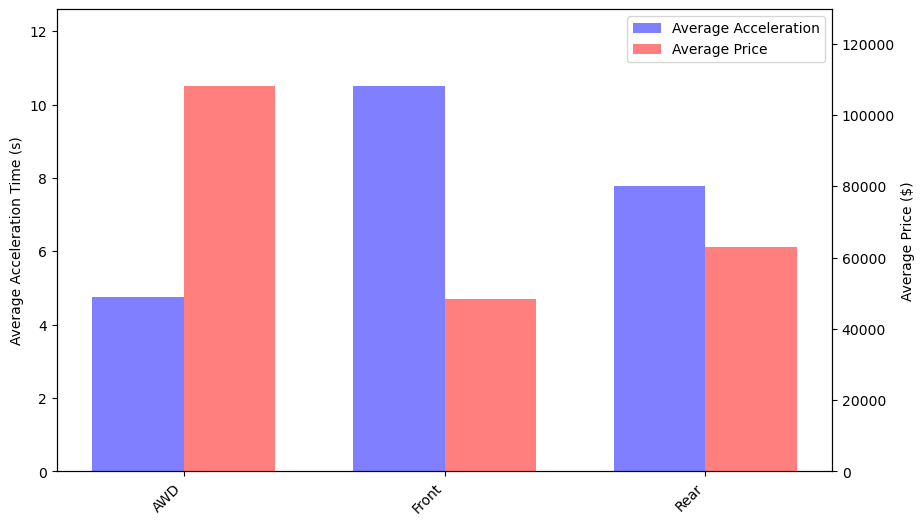

In [543]:

grouped_data = df.groupby('Drive').agg({'Acceleration 0 - 100 km/h': 'mean', 'Price USD': 'mean'}).reset_index()

sorted_data = grouped_data.sort_values('Acceleration 0 - 100 km/h')  # Sort by average acceleration
# or
sorted_data = grouped_data.sort_values('Price USD')  # Sort by average price

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Set the width of the bars
bar_width = 0.35

# Plot the average acceleration
ax1.bar(sorted_data.index, sorted_data['Acceleration 0 - 100 km/h'], width=bar_width, color='b', alpha=0.5, label='Average Acceleration')
ax1.set_ylabel('Average Acceleration Time (s)')

# Plot the average price
ax2.bar(sorted_data.index + bar_width, sorted_data['Price USD'], width=bar_width, color='r', alpha=0.5, label='Average Price')
ax2.set_ylabel('Average Price ($)')

# Set the tick positions and labels for the x-axis
ax1.set_xticks(sorted_data.index + bar_width / 2)
ax1.set_xticklabels(sorted_data['Drive'], rotation=45, ha='right')

# Set the limits for the y-axis on both axes
ax1.set_ylim([0, sorted_data['Acceleration 0 - 100 km/h'].max() * 1.2])
ax2.set_ylim([0, sorted_data['Price USD'].max() * 1.2])

# Create a shared legend for both bars
bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(bars1 + bars2, labels1 + labels2, loc='upper right')

# Show the plot
plt.show()


188


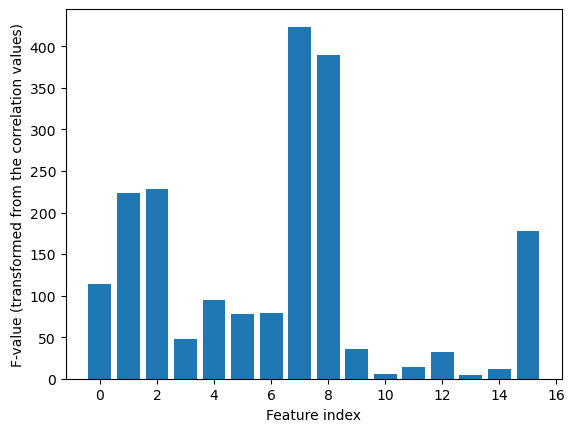

Feature index 0: Acceleration 0 - 100 km/h
Feature index 1: Top Speed
Feature index 2: Nominal Capacity
Feature index 3: Range
Feature index 4: Vehicle Consumption
Feature index 5: Vehicle Fuel Equivalent
Feature index 6: Electric Range
Feature index 7: Total Power
Feature index 8: Total Torque
Feature index 9: City - Cold Weather
Feature index 10: Highway - Cold Weather
Feature index 11: Combined - Cold Weather
Feature index 12: City - Mild Weather
Feature index 13: Highway - Mild Weather
Feature index 14: Combined - Mild Weather
Feature index 15: Useable Capacity


In [544]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# df_numeric.info()
df_numeric.drop(columns=['Rated Consumption', 'Rated Fuel Equivalent', 'Nominal Voltage'], inplace=True)
df_regression = df_numeric.dropna()
print(len(df_regression))
y = df_regression['Price USD']
X = df_regression.drop(columns = 'Price USD')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Feature selection using SelectKBest and F-value (correlation)
f_selector = SelectKBest(score_func=f_regression, k="all")
# Learn the relationship from the training data
f_selector.fit(X_train, y_train)
# Transform the training input data
X_train_fs = f_selector.transform(X_train)
# Transform the test input data
X_test_fs = f_selector.transform(X_test)

# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("Feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

# Retrieve selected feature indices
feature_indices = f_selector.get_support(indices=True)

# Retrieve corresponding feature names
selected_features = X.columns[feature_indices]

# Print the selected features and their indices
for index, feature in zip(feature_indices, selected_features):
    print(f"Feature index {index}: {feature}")


In [582]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define a list of k values to try
k_values = [1, 2, 3]

# Perform feature selection and linear regression for each k value
for k in k_values:
    # Perform feature selection
    f_selector = SelectKBest(score_func=f_regression, k=k)
    X_train_fs = f_selector.fit_transform(X_train, y_train)

    # Perform linear regression
    regressor = LinearRegression()
    regressor.fit(X_train_fs, y_train)

    # Perform cross-validation
    cv_scores = cross_val_score(regressor, X_train_fs, y_train, cv=5)

    # Print the results
    print(f"k = {k}")
    print("Cross-validation scores:", cv_scores)
    print("Average cross-validation score:", round(np.mean(cv_scores), 3))

    # Evaluate the model on the test set
    X_test_fs = f_selector.transform(X_test)
    y_pred = regressor.predict(X_test_fs)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    # print(regressor.coef_)
    # print(regressor.intercept_)

    print("Test RMSE:", round(test_rmse, 2))
    print("Test MAE:", round(test_mae, 2))
    print("Test R-squared:", round(test_r2, 4))
    adj = (1 - (1-regressor.score(X_test_fs, y_test))*(len(y_test)-1)/(len(y_test)-X_test_fs.shape[1]-1))
    print("Adjusted R-squared:", round(adj,4))
    print()

k = 1
Cross-validation scores: [0.75404875 0.73202207 0.68709886 0.81347772 0.70364525]
Average cross-validation score: 0.738
Test RMSE: 21886.85
Test MAE: 14266.4
Test R-squared: 0.6401
Adjusted R-squared: 0.6335

k = 2
Cross-validation scores: [0.80218917 0.78674017 0.76516184 0.76950842 0.65533482]
Average cross-validation score: 0.756
Test RMSE: 19755.93
Test MAE: 13225.48
Test R-squared: 0.7068
Adjusted R-squared: 0.6959

k = 3
Cross-validation scores: [0.81823792 0.82045988 0.84287178 0.84525953 0.63672723]
Average cross-validation score: 0.793
Test RMSE: 19960.93
Test MAE: 14464.08
Test R-squared: 0.7006
Adjusted R-squared: 0.6837

